<a href="https://colab.research.google.com/github/Folkas/autoplius-scraper/blob/main/315.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: Machine Learning

## Module 1: Machine Learning

### Sprint 1: Basic Machine Learning

### House prices regression competition

## Background

---

Participating in Kaggle competitions is an efficient way to learn some aspects of Machine Learning. You can read solutions made public by the others, participate in the discussions to talk about solution ideas and test them by submitting them for evaluation.

The metric used for evaluation can vary from competition to competition, but the idea remains the same - build a model that is as accurate as possible on the testing set. In industry, there are other factors to consider when building machine learning models - inference time, solution complexity, maintainability and so on. However, even though you only learn a subset of the required skills while participating in Kaggle competitions, it is quite a fun way to learn by doing it, so let's participate in one of the tutorial competitions now!

## The competition

In the previous notebooks, we learned about some very important ML topics:

- Optimizing an objective
- Training, validation, testing sets
- Feature engineering
- Logistic regression model
- Linear regression model
- Random forest model
- Interpreting the model by looking at the important features

In this notebook we will practice all the above concepts by participating in another Kaggle competition:

- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

Read the overview and look at the evaluation section (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation). The target to predict is a continuous variable and hence we will build regression models.

Now look at the data section - inspect the columns that are available. Download the data and start with exploratory data analysis, similar to the one you used in the previous notebooks. Select some features, maybe do some feature engineering and build linear regression and random forest models using sklearn.

For help, you can look at some of the notebooks by other competitors. However, try to write code by yourself, as even though you will always be able to consult external resources while working as a professional, the main thing right now to is learn, not to get a good score in the leaderboard. These two notebooks could be useful:

- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python for exploratory data analysis
- https://www.kaggle.com/marcelopesse/house-prices-machine-learning-with-sklearn using random forests for regression

---

## Concepts to explore

- Linear regression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Random forest regressor https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- Root mean squared error https://en.wikipedia.org/wiki/Root-mean-square_deviation

## Requirements

- Build and submit a linear regression model
- Build and submit a random forest regressor model
- Achieve a score better than 0.14 on the public leaderboard

## Evaluation criteria

- Public leaderboard score
- How simple is the model
- Code quality

In [ ]:
!pip install eli5

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Feature Engineering

In [ ]:
# loading data sets
df_train = pd.read_csv("house_train.csv").set_index("Id")
df_test = pd.read_csv("house_test.csv").set_index("Id")

print(f"Shape of training data set: {df_train.shape}")
print(f"Shape of test data set: {df_test.shape}")

Shape of training data set: (1460, 80)
Shape of test data set: (1459, 79)


In [ ]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
pd.get_dummies(df_train[["MSZoning", "LotFrontage", "Street", "OverallQual"]])

,LotFrontage,OverallQual,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave
Id,,,,,,,,,
1,65.0,7,0,0,0,1,0,0,1
2,80.0,6,0,0,0,1,0,0,1
3,68.0,7,0,0,0,1,0,0,1
4,60.0,7,0,0,0,1,0,0,1
5,84.0,8,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1456,62.0,6,0,0,0,1,0,0,1
1457,85.0,6,0,0,0,1,0,0,1
1458,66.0,7,0,0,0,1,0,0,1


The train data set has 1460 rows and 80 columns, while the test one has 1459 rows and 79 columns (no SalePrice column).

In [ ]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Looking at SalePrice variable, I can see that the values range from 34 900 to 755 000 dollars. The range is wide, so it's worth use natural logarithm for the target variable. However, after predicting the values for the test data set, I will exponentiate the SalePrice to obtain the correct predicted house prices in dollars.

In [ ]:
# logging SalePrice values
df_train.SalePrice = np.log(df_train.SalePrice)

##Correlations

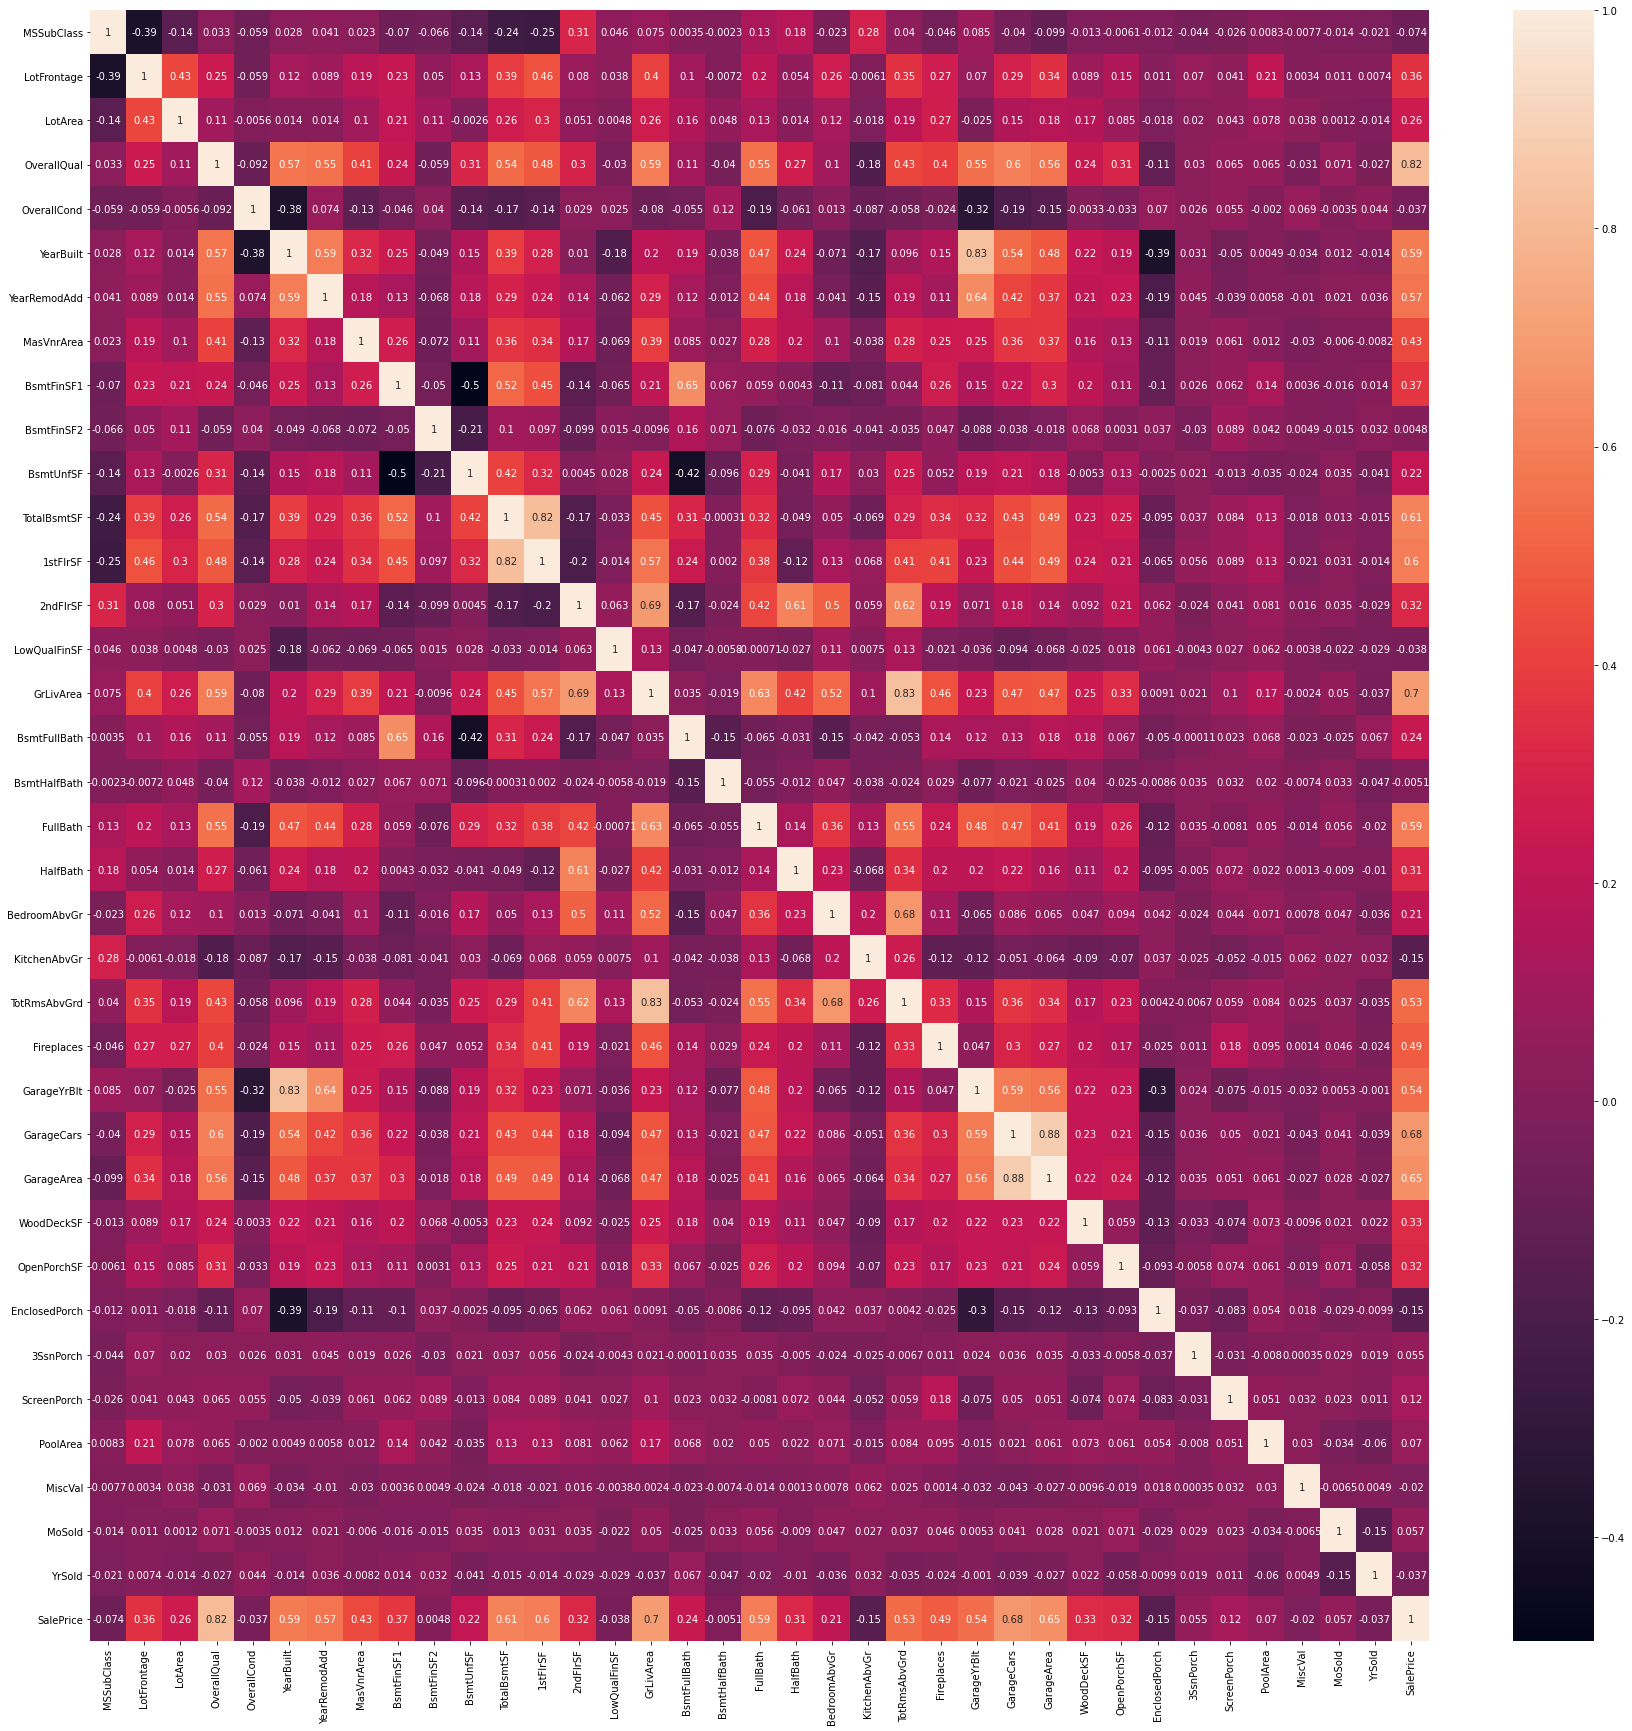

In [ ]:
correlations = df_train.corr()

plt.figure(figsize=(30,30))
sns.heatmap(correlations, annot=True, fmt='.2g')

The heatmap above depicts bivariate correlations among numerical variables in df_train. I will filter out one variable from pairs, where bivariate correlation is >0.80:
* YearBuilt - GarageYrBlt: **GarageYrBlt will be removed, as it most likely duplicates the YearBuilt values**
* TotRmsAbvGrd ( Total rooms above grade (does not include bathrooms)) - GrLivArea (Above grade (ground) living area square feet): **TotRmsAbvGrd will be removed**
* GarageArea - GarageCars: **garage area and cars in it are directly related. I will leave only GarageArea variable**

In [ ]:
#removing too highly correlated variables
df_train = df_train.drop(["GarageYrBlt", "TotRmsAbvGrd", "GarageCars"], axis=1)
df_test = df_test.drop(["GarageYrBlt", "TotRmsAbvGrd", "GarageCars"], axis=1)

##NaN values

In [ ]:
#filtering out columns with null values
nans = df_train.isnull().sum()
total = pd.Series(nans[nans !=0].sort_values(ascending=False), name="NaN Values")

percent = pd.Series((df_train.isnull().sum()/df_train.isnull().count()), name="% out of all Values")
pd.concat([total, percent], join="inner", axis=1)

,NaN Values,% out of all Values
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479


Considering that df_train data set has 1460 observations, I can see that 5 columns have nearly half or more than half missing values: 
* **PoolQC**: Pool quality
* **MiscFeature**: Miscellaneous feature not covered in other categories
* **Alley**: Type of alley access
* **Fence**: Fence quality
* **FireplaceQu**: Fireplace quality

I'm going to remove these columns from both data sets too.

**NB:** removing the rest of features with null values didn't improve the RMSE score.

In [ ]:
#removing features with too many missing values
df_train = df_train.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1)
df_test = df_test.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1)

In [ ]:
#replacing remaining null values with mode values for categorical variables and median values for int or floating variables

def fillnulls(dataset):

  for column in dataset.columns:
    if dataset[column].dtype == 'O':
      dataset[column].fillna(dataset[column].mode()[0], inplace=True)
    else:
      dataset[column].fillna(dataset[column].median(), inplace=True)

fillnulls(df_train)
fillnulls(df_test)

#just to make sure there are no null values
df_test.isnull().sum().sort_values(ascending=False)

SaleCondition    0
ExterQual        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
                ..
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
MSSubClass       0
Length: 71, dtype: int64

##Dummy variables

In [ ]:
def todummies(dataset):
  columns = dataset.select_dtypes('object').columns
  dummies = pd.get_dummies(dataset[columns])
  dataset = dataset.join(dummies).drop(columns, axis=1)
  return dataset


todummies(df_train)



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
#converting categorical variables into dummies
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [ ]:
print(f'Shape of Training Data: {df_train.shape}')
print(f'Shape of Testing Data: {df_test.shape}')

Shape of Training Data: (1460, 268)
Shape of Testing Data: (1459, 251)


I can see that the number of columns in training and testing data sets is not the same. This is due to One-Hot-Encoding procedure applied before. Therefore, I will need to align the number of columns in both datasets.

In [ ]:
SalePrice = df_train.SalePrice

#aligning train and test data sets on the same columns
df_train, df_test = df_train.align(df_test, join="inner", axis=1)

#returning SalePrice column to the test data set
df_train["SalePrice"] = SalePrice
print(f'Shape of Training Data: {df_train.shape}')
print(f'Shape of Testing Data: {df_test.shape}')

Shape of Training Data: (1460, 252)
Shape of Testing Data: (1459, 251)


###Remodelling YearBuilt and YearRemodAdd variables

In [ ]:
df_train.YearBuilt.describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

Text(0, 0.5, 'Count')

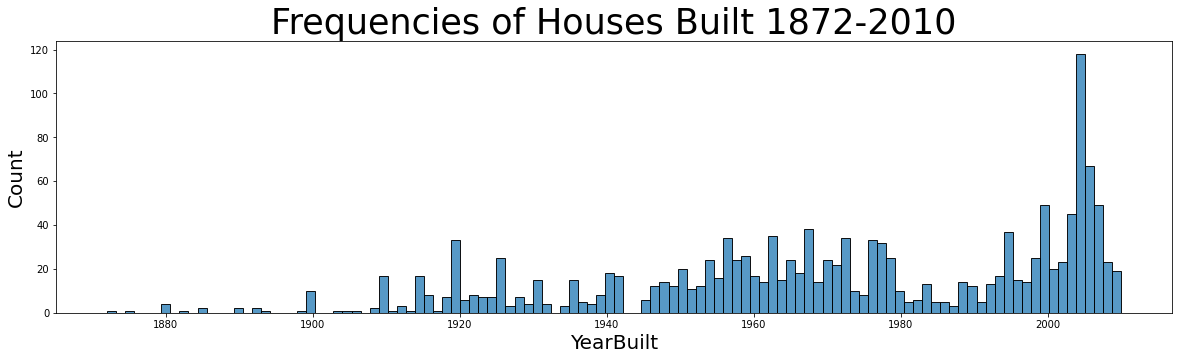

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(df_train.YearBuilt, bins=112)
plt.title("Frequencies of Houses Built 1872-2010", size=35)
plt.xlabel('YearBuilt', fontsize=20)
plt.ylabel('Count', fontsize=20)

There are 112 and 61 respective unique values in YearBuilt and YearRemodAdd features. I'm going to reduce the number of unique values by assigning years to the decades.

In [ ]:
#replacing year variables with decades
df_train.YearBuilt = df_train.YearBuilt.apply(lambda x: np.floor(x/10)*10)
df_train.YearRemodAdd = df_train.YearRemodAdd.apply(lambda x: np.floor(x/10)*10)

df_test.YearBuilt = df_test.YearBuilt.apply(lambda x: np.floor(x/10)*10)
df_test.YearRemodAdd = df_test.YearRemodAdd.apply(lambda x: np.floor(x/10)*10)

In [ ]:
df_train.YearBuilt.unique()
#pd.rolling

array([2000., 1970., 1910., 1990., 1930., 1960., 1920., 1950., 1980.,
       1940., 1880., 1900., 1890., 2010., 1870.])

##Modelling

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

x_train = df_train.drop("SalePrice", axis=1)
y_train = df_train.SalePrice

x_test = df_test

In [ ]:
#training the linear regression model
linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_train = linreg.predict(x_train)
print('Training root mean squared error is', mean_squared_error(np.log(y_train), np.log(y_pred_train), squared=False))

Training root mean squared error is 0.008941498812217752


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
 
perm = PermutationImportance(linreg, random_state=1).fit(x_train, y_train)
eli5.show_weights(perm, feature_names = x_train.columns.tolist())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.1010 ± 0.0086,GrLivArea
0.0676 ± 0.0045,RoofMatl_CompShg
0.0609 ± 0.0042,OverallQual
0.0459 ± 0.0052,GarageQual_Fa
0.0454 ± 0.0036,HouseStyle_1Story
0.0453 ± 0.0027,GarageQual_TA
0.0310 ± 0.0021,HouseStyle_2Story
0.0238 ± 0.0038,RoofStyle_Gable
0.0223 ± 0.0052,RoofMatl_WdShngl
0.0205 ± 0.0017,GarageArea


According to Permutation Importance table, ```GrLivArea``` (above grade (ground) living area square feet) is the most important feature. I will add ```GrLivArea^2``` feature to train and test data sets. 
**NB:** same operation with ```OverallQual```, nor mutual multiplication, didn't lead to lower RMSE.

In [ ]:
df_train["GrLivArea^2"] = df_train.GrLivArea**2
df_test["GrLivArea^2"] = df_test.GrLivArea**2

In [ ]:
#training the updated linear regression model

x_train = df_train.drop("SalePrice", axis=1)
y_train = df_train.SalePrice

x_test = df_test

linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_train = linreg.predict(x_train)
print('Training root mean squared error is', mean_squared_error(np.log(y_train), np.log(y_pred_train), squared=False))

Training root mean squared error is 0.008227800380268295


##Predicting house prices for test data set with linear regression

In [ ]:
#predicting house prices and exponentiating them
y_pred_test = np.exp(linreg.predict(x_test))
submission = pd.DataFrame({"Id": x_test.index, "SalePrice": y_pred_test})
submission.head()

,Id,SalePrice
0,1461,119483.086547
1,1462,145884.533247
2,1463,180935.515679
3,1464,194564.962824
4,1465,199504.549061


In [ ]:
#exporting the table to .csv file
submission.to_csv("sample_submission8.csv", index=False)

In [ ]:
submission.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,178766.189609
std,421.321334,78966.532334
min,1461.000000,37954.547032
25%,1825.500000,126179.855254
50%,2190.000000,158918.019279
75%,2554.500000,210006.033692
max,2919.000000,585397.200057


##Random Forest model

In [ ]:
df_train["GrLivArea*OverallQual"] = df_train.GrLivArea * df_train.OverallQual
df_test["GrLivArea*OverallQual"] = df_test.GrLivArea * df_test.OverallQual

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RANDOM_STATE = 10

In [ ]:
rfr = RandomForestRegressor(
    n_estimators=100,
    max_depth=7,
    max_features=0.5,
    random_state=RANDOM_STATE
)

In [ ]:
x_train = df_train.drop("SalePrice", axis=1)
y_train = df_train.SalePrice

rfr.fit(x_train, y_train)

y_pred_train = rfr.predict(x_train)
print('Training root mean squared error is', mean_squared_error(np.log(y_train), np.log(y_pred_train), squared=False))

Training root mean squared error is 0.007728561763181229


When random_state is set to 10, RMSE = 0.007749368266316348 (0.00728561763181229 if ```GrLivArea*OverallQual``` is added)

###Selecting hyperparameters with RandomizedSearchCV


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}
RSEED = 10
# Estimator for use in random search
estimator = RandomForestRegressor(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'neg_root_mean_squared_error', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   23.0s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rs.best_params_

{'bootstrap': True,
 'max_depth': 7,
 'max_features': 0.5,
 'max_leaf_nodes': 41,
 'min_samples_split': 5,
 'n_estimators': 161}

In [ ]:
rs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=0.5, max_leaf_nodes=41,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=161, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [ ]:
#predicting train data set with best estimators selected by RandomizedSearchCV
y_pred_train = rs.best_estimator_.predict(x_train)

In [ ]:
print('Training root mean squared error is', mean_squared_error(np.log(y_train), np.log(y_pred_train), squared=False))

Training root mean squared error is 0.009220006352463644


To sum up, training the model on random forest regressor with hyperparameters selected by RandomizedSearchCV, in fact, worsened the RMSE.

##Predicting house prices for test data set with random forest model

In [ ]:
y_pred_test = np.exp(rfr.predict(x_test))
submission = pd.DataFrame({"Id": x_test.index, "SalePrice": y_pred_test})
submission

,Id,SalePrice
0,1461,128735.839607
1,1462,150588.574495
2,1463,182450.109698
3,1464,182153.646910
4,1465,198156.287877
...,...,...
1454,2915,88342.851198
1455,2916,90244.125538
1456,2917,148668.795512
1457,2918,115957.530056


In [ ]:
submission.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,175711.383523
std,421.321334,69506.688032
min,1461.000000,53639.981182
25%,1825.500000,129921.673067
50%,2190.000000,155748.143774
75%,2554.500000,203150.052497
max,2919.000000,483878.868098


In [ ]:
submission.to_csv("sample_submission11.csv", index=False)


##Features which didn't help to improve RMSE

In [ ]:
#StandardScaler - increases RMSE by 1
# from sklearn.preprocessing import StandardScaler
# x_train = StandardScaler().fit_transform(x_train)

In [ ]:
## removing columns with NaN values didn't reduce RMSE
# df_train = df_train.drop(["LotFrontage", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtFinType1", "BsmtCond", "BsmtQual"], axis=1)
# df_test = df_test.drop(["LotFrontage", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtFinType1", "BsmtCond", "BsmtQual"], axis=1)

In [ ]:
##Adding OverallQual^2 increases RMSE by 0.0002

# df_train["OverallQual^2"] = df_train.OverallQual**2
# df_test["OverallQual^2"] = df_test.OverallQual**2

In [ ]:
#categorizing Year variables didn't bring RMSE to 0.1303

# YearBuilt_remodelled = pd.cut(df_train.YearBuilt, 14)
# YearRemodAdd_remodelled = pd.cut(df_train.YearRemodAdd, 6)
# YearRemodAdd_remodelled

# df_train.loc[df_train["YearRemodAdd"] < 1960, "YearRemodAdd"] = 0
# df_train.loc[(df_train["YearRemodAdd"] >= 1960)&(df_train["YearRemodAdd"] <= 1970), "YearRemodAdd"] = 1
# df_train.loc[(df_train["YearRemodAdd"] > 1970)&(df_train["YearRemodAdd"] <= 1980), "YearRemodAdd"] = 2
# df_train.loc[(df_train["YearRemodAdd"] > 1980)&(df_train["YearRemodAdd"] <= 1990), "YearRemodAdd"] = 3
# df_train.loc[(df_train["YearRemodAdd"] > 1990)&(df_train["YearRemodAdd"] <= 2000), "YearRemodAdd"] = 4
# df_train.loc[(df_train["YearRemodAdd"] > 2000)&(df_train["YearRemodAdd"] <= 2010), "YearRemodAdd"] = 5
# # dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
# df_train["YearRemodAdd"].unique()

# YearBuilt_remodelled

# df_train.loc[df_train["YearBuilt"] < 1882, "YearBuilt"] = 0
# df_train.loc[(df_train["YearBuilt"] >= 1882)&(df_train["YearBuilt"] <= 1892), "YearBuilt"] = 1
# df_train.loc[(df_train["YearBuilt"] > 1892)&(df_train["YearBuilt"] <= 1902), "YearBuilt"] = 2
# df_train.loc[(df_train["YearBuilt"] > 1902)&(df_train["YearBuilt"] <= 1912), "YearBuilt"] = 3
# df_train.loc[(df_train["YearBuilt"] > 1912)&(df_train["YearBuilt"] <= 1922), "YearBuilt"] = 4
# df_train.loc[(df_train["YearBuilt"] > 1922)&(df_train["YearBuilt"] <= 1932), "YearBuilt"] = 5
# df_train.loc[(df_train["YearBuilt"] > 1932)&(df_train["YearBuilt"] <= 1941), "YearBuilt"] = 6
# df_train.loc[(df_train["YearBuilt"] > 1941)&(df_train["YearBuilt"] <= 1951), "YearBuilt"] = 7
# df_train.loc[(df_train["YearBuilt"] > 1951)&(df_train["YearBuilt"] <= 1961), "YearBuilt"] = 8
# df_train.loc[(df_train["YearBuilt"] > 1961)&(df_train["YearBuilt"] <= 1971), "YearBuilt"] = 9
# df_train.loc[(df_train["YearBuilt"] > 1971)&(df_train["YearBuilt"] <= 1981), "YearBuilt"] = 10
# df_train.loc[(df_train["YearBuilt"] > 1981)&(df_train["YearBuilt"] <= 1991), "YearBuilt"] = 11
# df_train.loc[(df_train["YearBuilt"] > 1991)&(df_train["YearBuilt"] <= 2001), "YearBuilt"] = 12
# df_train.loc[(df_train["YearBuilt"] > 2001)&(df_train["YearBuilt"] <= 2010), "YearBuilt"] = 13


In [ ]:
# #Selecting the most important features from the data set didn't reduce RMSE

# from sklearn.feature_selection import SelectFromModel
# selector = SelectFromModel(
#     estimator=linear_model.LinearRegression(),
#     threshold='mean'
# )
# selector.fit(x_train, y_train)

# selector.get_support()
# x_train_selected = selector.transform(x_train)

# linreg = linear_model.LinearRegression()
# linreg.fit(x_train_selected, y_train)

# y_pred_train = linreg.predict(x_train_selected)
# print('Training root mean squared error is', mean_squared_error(np.log(y_train), np.log(y_pred_train), squared=False))

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False,
                threshold='mean')

In [ ]:
# #Choosing the best random state for rfr
# labas =[]
# for i in range (0, 100):
#   rfr = RandomForestRegressor(
#     n_estimators=100,
#     max_depth=7,
#     max_features=0.5,
#     random_state=i)
#   rfr.fit(x_train, y_train)

#   y_pred_train = rfr.predict(x_train)
#   RMSE = mean_squared_error(np.log(y_train), np.log(y_pred_train), squared=False)
#   labas.append([i, RMSE])
#   print('Training mean squared error is', RMSE)

Training mean squared error is 0.007849879177606246
Training mean squared error is 0.00783839580032289
Training mean squared error is 0.007838490362448724
Training mean squared error is 0.007896695096781618
Training mean squared error is 0.007920745563062864
Training mean squared error is 0.007876095275325805
Training mean squared error is 0.007912455372903998
Training mean squared error is 0.00796206056681568
Training mean squared error is 0.007847149601216982
Training mean squared error is 0.007925203318440958
Training mean squared error is 0.007749368266316348
Training mean squared error is 0.007870405679473
Training mean squared error is 0.007835853843964454
Training mean squared error is 0.00784861051536452
Training mean squared error is 0.007827279836018964
Training mean squared error is 0.007879759170954103
Training mean squared error is 0.007890883791057011
Training mean squared error is 0.007852572044993558
Training mean squared error is 0.007888159756647512
Training mean squa